In [75]:
# import libraries
import imp
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [76]:
# Import dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [77]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

EDA

In [78]:
# Check for missing values
df.isnull().sum().sum()

0

In [116]:
df.duplicated().sum()

0

In [117]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [79]:
profile = ProfileReport(df)

In [80]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

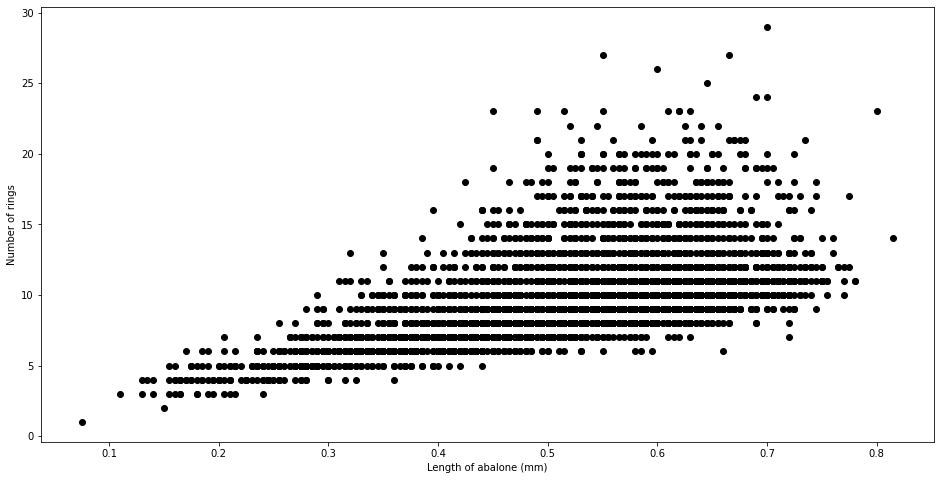

In [81]:
plt.figure(figsize=(16,8))
plt.scatter(df['Length'], df['Rings'], c ='black')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

There is a kind of a trend in the plot

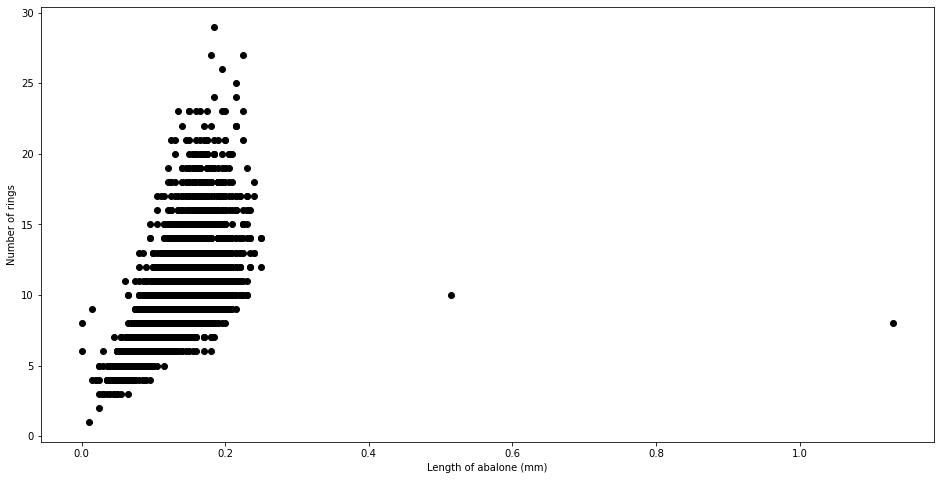

In [82]:
plt.figure(figsize=(16,8))
plt.scatter(df['Height'], df['Rings'], c ='black')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

We have two outliers 

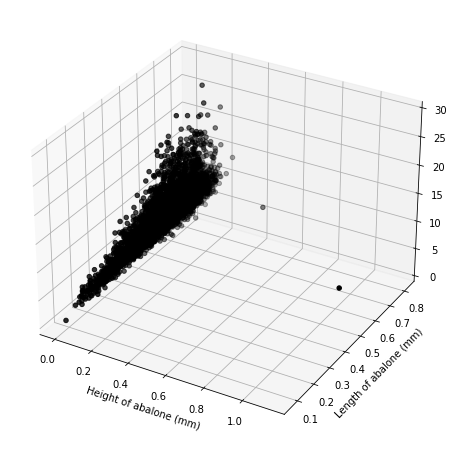

In [83]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection = '3d')
ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.scatter3D(df['Height'], df['Length'], df['Rings'], c='black')

In [84]:
encoded_data = pd.get_dummies(df)
encoded_data

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0           0.1500     15      0      0      1  
1           0.0700      7      0      0      1  
2           0.2100      9      1      0      0  
3           0.1550     10      0      0      1  
4           0.0550      7      0      1      0  
...            ...    ...    ...    ...    ...  
4172        0.2490     11      1      0      0  
4173        0.2605     10      0      0      1  
4174        0.3080      9      0      0      1  
4175        0.2960     10      1      0      0  
4176        0.4950     12      0      0      1  

[4177 rows x 11 columns]

Modelling

Split dataset

In [85]:
training_set = encoded_data.iloc[:4099, :]
validation_set = encoded_data.iloc[4099:, :]

print(training_set.shape)
print(validation_set.shape)

(4099, 11)
(78, 11)


Baseline model: Multiple linear regression

In [86]:
X = training_set[['Length', 'Height']]
y = training_set['Rings'].values.reshape(-1,1)

X_val = validation_set[['Length', 'Height']]
y_val = validation_set['Rings'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [87]:


lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)



LinearRegression()

In [88]:
# RSME
lin_reg_pred = lin_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared = False)

print(f'Test RMSE: {test_rmse}')



Test RMSE: 2.5679099174951547


In [89]:
# Validation RMSE

lin_reg_pred_val = lin_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, lin_reg_pred_val, squared =False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 1.566178378231161


Multiple linear regression with regularization (ridge regression)

In [90]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_root_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train);

print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)


{'alpha': 1}
2.6564563658448885


In [91]:
ridge_reg = Ridge(alpha =1)
ridge_reg.fit(X_train, y_train)

ridge_reg_pred = ridge_reg.predict(X_test)

In [92]:
# Test RMSE
test_rmse = mean_squared_error(y_test, ridge_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 2.587130009710829


In [93]:
# Validation RMSE
ridge_reg_pred_val = ridge_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, ridge_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 1.5640813253014876


Multiple linear regression with regularization (lasso)

In [94]:
lasso = Lasso(tol=  0.05)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv= 5)
lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)


{'alpha': 0.01}
7.130917624445475


In [95]:
lasso_reg = Lasso(alpha =0.01)
lasso_reg.fit(X_train, y_train)

lasso_reg_pred = lasso_reg.predict(X_test)

In [96]:
# Test RMSE
test_rmse = mean_squared_error(y_test, lasso_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 2.610473125813745


In [97]:
# Validation RMSE
lasso_reg_pred_val = lasso_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, lasso_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 1.5563831232308816


Tree-based models

In [98]:
X = training_set.drop(['Diameter', 	'Whole weight',	'Shucked weight','Viscera weight','Shell weight','Rings'], axis =1)
y - training_set['Rings'].values.reshape(-1,1)
X_val = validation_set.drop(['Diameter', 	'Whole weight',	'Shucked weight','Viscera weight','Shell weight','Rings'], axis =1)
y_val = validation_set['Rings'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.1, random_state=42)

Random Forest

In [99]:



rf = RandomForestRegressor()

parameters = {'n_estimators':[ int(x) for x in np.linspace(100,1000,10)]}
rf_regressor = GridSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv =5)
rf_regressor.fit(X_train, y_train.ravel())
print(rf_regressor.best_params_)
print(-rf_regressor.best_score_)

{'n_estimators': 900}
8.39773383267205


In [100]:
rf_reg = RandomForestRegressor(n_estimators= 900)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=900)

In [101]:
# Test RMSE
rf_reg_pred = rf_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 2.6511152923820336


In [102]:
# Validation RMSE
rf_reg_pred_val = rf_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, rf_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 2.2658952978844393


Bagging

In [103]:
bg = BaggingRegressor()


parameters = {'n_estimators':[ int(x) for x in np.linspace(10,1000,10)], 'max_samples': [float(x) for x in np.arange(0.1, 1.1, 0.1)]}
bg_regressor = GridSearchCV(bg, parameters, scoring = 'neg_mean_squared_error', cv =5)
bg_regressor.fit(X_train, y_train.ravel())
print(bg_regressor.best_params_)
print(-bg_regressor.best_score_)

{'max_samples': 0.1, 'n_estimators': 450}
6.581395850859875


In [104]:
bg_reg =BaggingRegressor(n_estimators = 450 , max_samples= 0.1)
bg_reg.fit(X_train, y_train.ravel())

bg_reg_pred = bg_reg.predict(X_test)

# Test RMSE
bg_reg_pred = bg_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, bg_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 2.4150555372220963


In [105]:
# Validation RMSE
bg_reg_pred_val = bg_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, bg_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 1.7271777274608986


LightGBM

In [108]:
params = {'learning_rate': 0.01}

train_data = lgb.Dataset(X_train.values, label = y_train.ravel())

In [109]:
lgb_reg = lgb.train(params, train_data, 100)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 3689, number of used features: 5
[LightGBM] [Info] Start training from score 9.955001


In [110]:
lgb_reg_pred = lgb_reg.predict(X_test)


In [111]:
# Test RMSE
lgb_reg_pred = bg_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, lgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 2.4150555372220963


In [112]:
# Validation RMSE
lgb_reg_pred_val = lgb_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, lgb_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 1.5097310114966809


compile results

In [113]:
rmse_compilation = {'model': ['linear regression', 'ridge regression', 'lasso', 'random forest', 'bagging', 'LightGBM'], 'RMSE': [1.5661, 1.5640, 1.556, 2.2658, 1.7271 , 1.5097]}


In [114]:
rmse_df = pd.DataFrame(data =rmse_compilation)
rmse_df.sort_values(by= ['RMSE'], ascending = True)

model    RMSE
5           LightGBM  1.5097
2              lasso  1.5560
1   ridge regression  1.5640
0  linear regression  1.5661
4            bagging  1.7271
3      random forest  2.2658

As we can see LightGBM model fits the best.